In [22]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import math
import datetime as dt
import pandas as pd
import os
from numpy import inf
import numpy as np

In [2]:
n = 2**10
t = 10**4
p = 0.0217
omega = 1
size = 1
k = 1

In [3]:
def buy_sell_hold(p):
    assert p <= 0.5, "p should be smaller than 0.5"
    p_b = p # buy/sell
    p_s = p
    p_h = 1 - 2*p # hold
    dice = rnd.uniform(0, 1)
    # if the dice rolls below p, roll a 50/50 dice to decide buy or sell
    if dice <= 2*p:
        if rnd.choice([0, 1]) == 0:
            psi = 1
        else:
            psi = -1
    else:
        psi = 0
    return psi

In [13]:
class Agent:
    def __init__(self, size) -> None:
        self.size = size

class Model:
    def __init__(self, p: float, n: int, size: int, k: int, omega: int) -> None:
        self.n = n
        self.p = p
        self.agents = [Agent(size) for i in range(n)]
        self.daily_return = []
        self.trading_volume = 0
        self.k = k
        self.omega = omega
        self.daily_returns = []
        self.count = 0

        self.daily_trading_volumes = []

        
    def distribute_opinion_groups(self) -> None:

        # number of opinion groups
        if sum(self.daily_return) != 0:
            c = (self.n // abs(sum(self.daily_return))) ** self.omega
        else:
            c = self.n
            
        
        opinion_groups = [[] for i in range(c)]
        opinion_agents = self.agents.copy()

        # distribute agents evenly
        for opinion_group in opinion_groups:
            for i in range(round(self.n / c)):
                if len(opinion_agents) > 0:
                    i = rnd.choice([i for i in range(len(opinion_agents))])

                    opinion_group.append(opinion_agents[i])
                    del opinion_agents[i]
                else:
                    break
                
        return opinion_groups

    def step(self):
        self.count += 1
        opinion_groups = self.distribute_opinion_groups()
        self.daily_return = []
        self.trading_volume = 0

        for opinion_group in opinion_groups:
            psi = buy_sell_hold(self.p)
            self.daily_return.append(psi * len(opinion_group))
            self.trading_volume += abs(psi * len(opinion_group))
    
        self.daily_returns.append(sum(self.daily_return) * k)
        self.daily_trading_volumes.append(self.trading_volume)

        return self.count

In [14]:
# ABM

model_test = Model(p, n, size, k, omega)
for i in range(t):
    model_test.step()


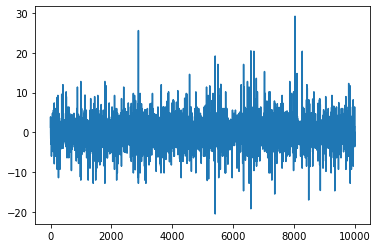

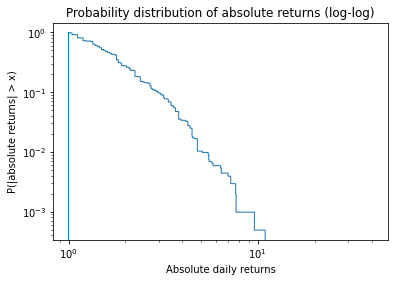

In [15]:
# logarithmic bins
bin=np.logspace(start=0, stop=np.log(5), num=t)

# normalised returns
returns = [(abs(day) - np.mean(model_test.daily_returns)) / np.std(model_test.daily_returns) for day in model_test.daily_returns]

plt.plot(model_test.daily_returns)
plt.show()

plt.figure(1)
plt.hist(returns, bin, cumulative=-1, density=True, log=True, histtype='step')
plt.title("Probability distribution of absolute returns (log-log)")
plt.xlabel("Absolute daily returns")
plt.ylabel("P(|absolute returns| > x)")
plt.gca().set_xscale("log")
plt.show()


In [7]:
# class Stochastic_Model:
#     def __init__(self, n: int, p: float, init: int, time_horizon: bool, M, d):
#         self.returns = [init]
#         self.n = n
#         self.p = p
#         self.time_horizon = time_horizon
#         self.M = M
#         self.d = d

#     def time_horizons(self):
#         time_horizons = []
#         alpha = []

#         # distribution of agents in different time horizons
#         # agents are allocated to each time horizon (with exponential decay as we go back in time), until we reach the limit M
#         # or until we reach the beginning of the simulation (if current timestep t < M)
#         for i in range(1, self.M + 1):
#             if len(self.returns) == 1:
#                 value = (i ** -self.d) * abs(self.returns[-1])
#                 alpha_val = (i ** -self.d)
#                 time_horizons.append(value)
#                 alpha.append(alpha_val)

#             elif i >= len(self.returns):
#                 value = (i ** -self.d) * abs(self.returns[-1] - self.returns[0])
#                 alpha_val = (i ** -self.d)
#                 time_horizons.append(value)
#                 alpha.append(alpha_val)

#             else:
#                 value = (i ** -self.d) * abs(self.returns[-1] - self.returns[-1-i])
#                 alpha_val = (i ** -self.d)
#                 time_horizons.append(value)
#                 alpha.append(alpha_val)

#         return sum(time_horizons) * (sum(alpha) ** -1)

#     def step(self):

#         # Agents only factor in the returns at the previous timestep
#         if self.time_horizon == False:
#             variance  = 2 * p * n * abs(self.returns[-1])
#             std = math.sqrt(variance)
#             value = std * np.random.normal(0.0, 1.0)
#             self.returns.append(value)
        
#         # Agents look back M timesteps
#         if self.time_horizon == True:
#             horizons = self.time_horizons()
#             variance  = 2 * p * n * horizons
#             std = math.sqrt(variance)
#             value = std * np.random.normal(0.0, 1.0)
#             self.returns.append(value)  

In [8]:
# # Stochastic simulation

# stochastic = Stochastic_Model(n, p, 10, time_horizon=False, M=10, d=1.12)
# stochastic_horizons = Stochastic_Model(n, p, 10, time_horizon=True, M=10, d=1.12)

# for i in range(t):
#     stochastic.step()
#     stochastic_horizons.step()

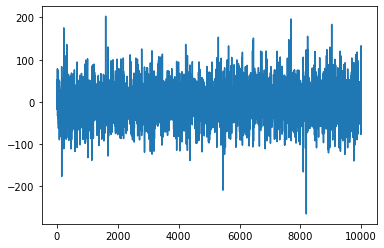

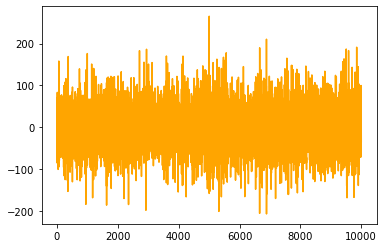

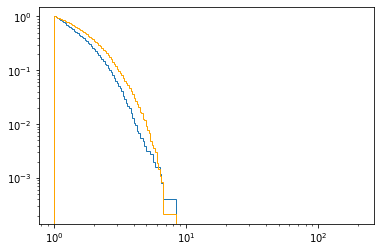

In [9]:
# plt.plot(range(t + 1), stochastic.returns)
# plt.show()

# plt.plot(range(t+1), stochastic_horizons.returns, color='orange')
# plt.show()

# abs_returns = [(abs(i) - np.mean(stochastic.returns)) / (np.std(stochastic.returns)) for i in stochastic.returns]
# abs_returns_horizons = [(abs(i) - np.mean(stochastic_horizons.returns)) / (np.std(stochastic.returns)) for i in stochastic_horizons.returns]
# bin=np.logspace(start=0, stop=np.log(10), num=200)

# plt.hist(abs_returns, bins=bin, cumulative=-1, density=True, log=True, histtype='step')
# plt.hist(abs_returns_horizons, bin, cumulative=-1, density=True, log=True, histtype='step', color = 'orange')
# plt.gca().set_xscale("log")
# plt.show()

In [10]:
# def regression(data_x, data_y, alpha, beta, learning_rate, iterations):
#     rmse = math.sqrt(np.mean([((alpha + beta * data_x[i]) - data_y[i])**2 for i in range(len(data_y))]))

#     for i in range(iterations):
#         # find differentials of the parametres
#         diff_alpha = 2 * np.mean([(data_x[i] * beta) for i in range(len(data_y))])
#         diff_beta = 2 * np.mean([(data_x[i] * beta) * data_x[i] for i in range(len(data_y))])

#         alpha_new = alpha - (learning_rate * diff_alpha)
#         beta_new = beta - (learning_rate * diff_beta)

#         rmse_zero_new = math.sqrt(np.mean([((alpha + beta * data_x[i]) - data_y[i])**2 for i in range(len(data_y))]))

#         # keep new parametres if they lead to smaller rmse
#         if rmse_zero_new < rmse_zero[-1]:
#             alpha = alpha_new
#             beta = beta_new
#             rmse_zero = rmse_zero_new

#     return alpha, beta, rmse

In [11]:
# def r_squared(data, alpha, beta, x_range):
#     """
#     Goodness of fit test for regression
#     """
#     ss_res = []
#     ss_total = []
#     mean = np.mean(data)

#     for i in range(x_range):
#         prediction = alpha + beta * x_range[i]
#         value = data[i]

#         residual = (value - prediction) ** 2
#         total = (value - mean) ** 2

#         ss_res.append(residual)
#         ss_total.append(total)

#     return 1 - (ss_res / ss_total)


In [12]:
# # k_test - think about ways to fit a power law
# k_range = [i*0.1 for i in range(1, 51)]
# variances = []

# for i in k_range:
#     k = i
#     k_test = Model(p, n, size, k=i, omega=1)
#     for step in range(t):
#         k_test.step()
#     print(k_test)
#     variance = np.std(k_test) ** 2
#     variances.append(variance)

AttributeError: 'Model' object has no attribute 'dtype'

In [ ]:
# # k - regression (if beta > 0, there is a relationship)
# def regression(data_x, data_y, alpha, beta, learning_rate, iterations):
# k_r = regression(k_range, variances, 0, 10, 1000)
# k_test = r_squared(variances, k_r[0], k_r[1], k_range)


In [ ]:
# # omega_test - think about ways to fit a power law
# omega_range = [i*0.1 for i in range(1, 51)]
# variances = []

# for i in omega_range:
#     omega = i
#     omega_test = Model(p, n, k, omega)
#     for step in range(t):
#         omega_test.step()

#     variance = np.std(omega_test) ** 2
#     variances.append(variance)

In [ ]:
# # omega - calculate regression of power law exponent and variances
# omega_r = regression(omega_range, variances, 3, 2)
# omega_test = r_squared(variances, omega_r[0], omega_r[1], omega_range)


In [ ]:
# # p_test - variances; mean number of zeros
# p_range = [i*0.01 for i in range(1, 101)]
# variances = []
# zeros = []

# for i in p_range:
#     p = i
#     p_test = Model(p, n, 1, k, omega)
#     for step in range(t):
#         p_test.step()

#     variance = np.std(p_test) ** 2
#     variances.append(variance)

#     for i in p_test.daily_returns:
#         zero = []
#         if -0.5 < i < 0.5:
#             zero.append(i)
        
#         zero_add = sum(zero) / len(p_test.daily_returns)
#         zeros.append(zero_add)

In [ ]:
# p_zeros_r = regression(p_range, zeros, 5, 5, 1, 1000)
# p_variances_r = regression(p_range, variances, 5, 5, 1, 1000)

# p_test_zeros = r_squared(zeros, p_zeros_r[0], p_zeros_r[1], p_range)
# p_test_variances = r_squared(variances, p_variances_r[0], p_variances_r[1], p_range)



### Real data

In [23]:
# importing data
df_clean_daily_returns = pd.read_csv('data/df_clean_daily_returns.csv')
df_volume_clean = pd.read_csv('data/df_volume_clean.csv')

# plottings daily return distribution

# removing date time index and date column
df_clean_daily_returns.reset_index(drop=True, inplace=True)
df_clean_daily_returns.drop(columns=['Date'], inplace=True)
# flattening the 2D dataframe into 1D array
flattened_returns = df_clean_daily_returns.to_numpy().flatten()

flattened_returns
abs_returns = abs(flattened_returns)

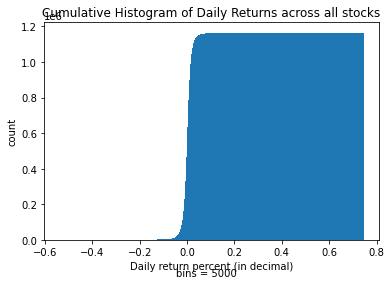

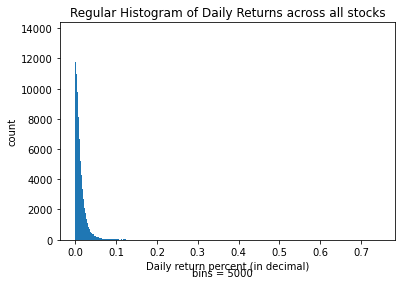

In [28]:
# Plotting cumulative histogram of daily returns across all stocks by 
bins = 5000
plt.hist(flattened_returns, bins, cumulative = True)
plt.title('Cumulative Histogram of Daily Returns across all stocks')
plt.xlabel('Daily return percent (in decimal)')
plt.ylabel('count')
plt.figtext(0.5, 0.01, f'bins = {bins}', ha='center', va='center')
plt.show()
# Plotting regular histogram of daily returns across all stocks by 
bins = 5000
plt.hist(abs_returns, bins)
plt.title('Regular Histogram of Daily Returns across all stocks')
plt.xlabel('Daily return percent (in decimal)')
plt.ylabel('count')
plt.figtext(0.5, 0.01, f'bins = {bins}', ha='center', va='center')
plt.show()

### Grid Search & LSQ

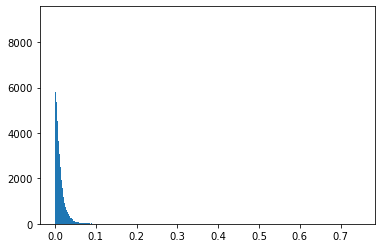

In [36]:
(n, real_bins, patches) = plt.hist(abs_returns, len(bin)-1)

In [71]:
# Example of parameter generation
parameters = np.arange(0, 10, 1)
print("parameters to test:", parameters)


def gridsearch(real, abm_or_stoch, parameters):
    best_param = 0
    best_loss = 1000000000
    for param in parameters:
        if abm_or_stoch == 'abm':
            model_test = Model(p, n, size, k, omega) # change the parameter to test to "param"
            for i in range(t):
                model_test.step()
            abs_returns = [abs(day) for day in model_test.daily_returns]
            result = np.array(abs_returns)
        else:
            stochastic = Stochastic_Model(n, p, 10, time_horizon=False, M=10, d=1.12)
            stochastic_horizons = Stochastic_Model(n, p, 10, time_horizon=True, M=10, d=1.12)
            for i in range(t):
                stochastic.step()
                stochastic_horizons.step()
            abs_returns = [abs(i) for i in stochastic.returns]
            result = np.array(abs_returns)
        rmse = np.sqrt(mean_squared_error(real, result))
        if rmse < best_loss:
            best_param = current_param
            best_loss = rmse
    return best_param, best_loss

# Implementation from https://archive.lib.msu.edu/crcmath/math/math/l/l142.html
def exp_lsq(x, y):
    n = len(bin) # sample size?
    ln_y = np.log(y, where= y != 0)
    sum_ln_y = np.sum(ln_y)
    sum_x = np.sum(x)
    sum_x_ln_y = np.sum(x * ln_y)
    print('sum_ln_y', sum_ln_y, 'sum_x', sum_x)
    a = (sum_ln_y * sum_x**2 - sum_x*sum_x_ln_y) / (n * np.sum(x**2) - sum_x**2)
    b = (n * sum_x_ln_y - sum_x*sum_ln_y)/(n * np.sum(x**2) - sum_x**2)
    return a, b

parameters to test: [0 1 2 3 4 5 6 7 8 9]


sum_ln_y -12924.385249249372 sum_x 107097.97320858309
-13654.60835452523 0.06345309008177295


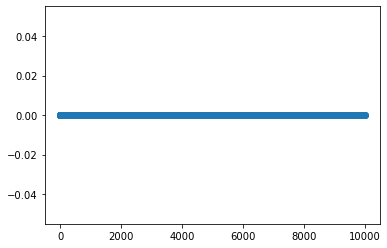

In [72]:
a, b = exp_lsq(bin, real_bins)
print(a,b)
x = np.arange(0, len(bin), 1)
y = np.exp(a)*math.e**(b*x)
plt.scatter(x,y)